<a href="https://colab.research.google.com/github/alies7790/kk/blob/master/Copy_of_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import os
import sys
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten,Conv2D,MaxPooling2D,LSTM
import pickle
 
import matplotlib.pyplot as plt
 
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fid = drive.ListFile({'q':"title='Image data set.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('Image data set.zip')

In [ ]:
!unzip "Image data set.zip"

Archive:  Image data set.zip
replace raw-img/cane/OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

KeyboardInterrupt: ignored

In [ ]:
DATA_DIR = '/content/raw-img'
CATERGORIES = ['cane','cavallo','elefante','farfalla','gallina','gatto','mucca','pecora','ragno','scoiattolo']
IMAGE_SIZE = 50

In [ ]:
def create_training_data():
    training_date = []
    for categories in CATERGORIES:
        path = os.path.join(DATA_DIR,categories)
        class_num = CATERGORIES.index(categories)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMAGE_SIZE,IMAGE_SIZE))
                training_date.append([new_array,class_num])
            except:
                pass
    return training_date

In [ ]:
cv2.imread("/content/raw-img/scoiattolo/OIP-zzy5kEbHuGBWXZ3c-D85aAHaE8.jpeg").shape

(200, 300, 3)

In [ ]:
 
data = np.asarray(create_training_data())
x_data = []
y_data = []
 
for x in data:
    x_data.append(x[0])
    y_data.append(x[1])

26179


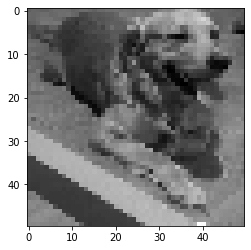

In [ ]:
plt.imshow(x_data[0],cmap='gray')
print(len(x_data))

In [ ]:
 
x_data_np = np.asarray(x_data)/255.0
y_data_np = np.asarray(y_data)

In [ ]:

pickle_out = open('x_data_np','wb')
pickle.dump(x_data_np,pickle_out)
pickle_out.close()

In [ ]:
 
pickle_out = open('y_data_np','wb')
pickle.dump(y_data_np,pickle_out)
pickle_out.close()

In [ ]:
X_Temp = open('x_data_np','rb')
x_data_np = pickle.load(X_Temp)

Y_Temp = open('y_data_np','rb')
y_data_np = pickle.load(Y_Temp)

In [ ]:

x_data_np = x_data_np.reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)


In [ ]:
print(x_data_np.shape[1:])

(50, 50, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x_data_np, y_data_np, test_size=0.2,random_state=2)

In [ ]:
from tensorflow.keras import regularizers
model = Sequential()
model.add(Conv2D(512, (3, 3), input_shape=(x_data_np.shape[1:])))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(256, kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.38))
model.add(Dense(256, kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.38))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 47, 47, 512)       8704      
_________________________________________________________________
activation_52 (Activation)   (None, 47, 47, 512)       0         
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 23, 23, 512)       0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 20, 20, 256)       2097408   
_________________________________________________________________
activation_53 (Activation)   (None, 20, 20, 256)       0         
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 10, 10, 256)       0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 7, 7, 128)       

In [ ]:
model.fit(X_Train, Y_Train, epochs=15)

Epoch 1/15
655/655 [==============================] - 16s 25ms/step - loss: 2.2917 - accuracy: 0.2770
Epoch 2/15
655/655 [==============================] - 16s 24ms/step - loss: 1.8847 - accuracy: 0.3977
Epoch 3/15
655/655 [==============================] - 16s 25ms/step - loss: 1.7515 - accuracy: 0.4457
Epoch 4/15
655/655 [==============================] - 16s 25ms/step - loss: 1.6666 - accuracy: 0.4766
Epoch 5/15
655/655 [==============================] - 16s 25ms/step - loss: 1.6121 - accuracy: 0.5019
Epoch 6/15
655/655 [==============================] - 16s 25ms/step - loss: 1.5551 - accuracy: 0.5260
Epoch 7/15
655/655 [==============================] - 16s 25ms/step - loss: 1.5244 - accuracy: 0.5356
Epoch 8/15
655/655 [==============================] - 16s 25ms/step - loss: 1.4903 - accuracy: 0.5421
Epoch 9/15
655/655 [==============================] - 16s 25ms/step - loss: 1.4741 - accuracy: 0.5511
Epoch 10/15
655/655 [==============================] - 16s 25ms/step - loss: 1.440

In [ ]:
model.evaluate(X_Test,  Y_Test, verbose=2)

164/164 - 3s - loss: 1.2922 - accuracy: 0.5573


[1.2922405004501343, 0.5572956204414368]